# Credit Score Modeling

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
#from sklearn.multiclass import OneVsRestClassifier
#from sklearn.svm import LinearSVC
#from sklearn.multiclass import OneVsOneClassifier
#from sklearn.multiclass import OutputCodeClassifier
#from sklearn.externals import joblib
from sklearn.preprocessing import  LabelEncoder
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
df = pd.read_excel('consolidated ratios.xlsx')
del df['year']
df.drop(df.head(1).index, inplace=True)
df.head()

,ratings,operating profit margin,Net Profit margin,Return on cap employed,return on equity,EBITDA Margin,Gearing ratio,debt to equity ratio,Indebtedness Ratio,Debt to Profit Ratio,Accruals to Debt Ratio,interest coverage ratio,Debt to EBITDA,current ratio,Debtor days,Working Capital Intensity
1,AA-,19.348826,8.050933,0.112602,0.119820,0.283897,1.107455,1.105257,1.876896,3.838174,0.239095,2.638140,2.556067,1.576116,35.599482,0.122249
2,AA-,16.281262,4.317305,0.089873,0.062802,0.256682,1.191126,1.189394,1.998187,5.021993,0.173634,1.557961,3.125424,1.203040,34.022897,0.050253
3,AA-,19.692440,7.014280,0.129696,0.109203,0.263313,1.091072,1.089639,1.594322,3.554110,0.203911,2.046152,2.597023,2.118804,32.082752,0.164093
4,AA-,17.938174,7.241432,0.132280,0.107410,0.225177,0.727259,0.726471,1.296456,2.730356,0.257034,2.603093,2.103337,2.234226,31.141804,0.235994
5,AAA,29.927491,-32.464468,0.016945,-0.115034,0.867542,5.258249,5.258249,5.892320,49.585434,0.016749,0.398410,17.008825,0.212392,112.910137,-1.409390


In [3]:
len(df.columns)

16

# Changing the ratings(e.g. AAA+ to AAA...)

In [4]:
df['ratings'].replace({'AA-': 'AA', 'AA+': 'AA', 'A+': 'A', 'A-': 'A', 'BBB+': 'BBB', 'BBB-': 'BBB', 'BB-': 'BB', 'BB+': 'BB', 'BB/D': 'D', 'B+': 'B'},inplace =True)

In [5]:
df['ratings'].nunique()

7

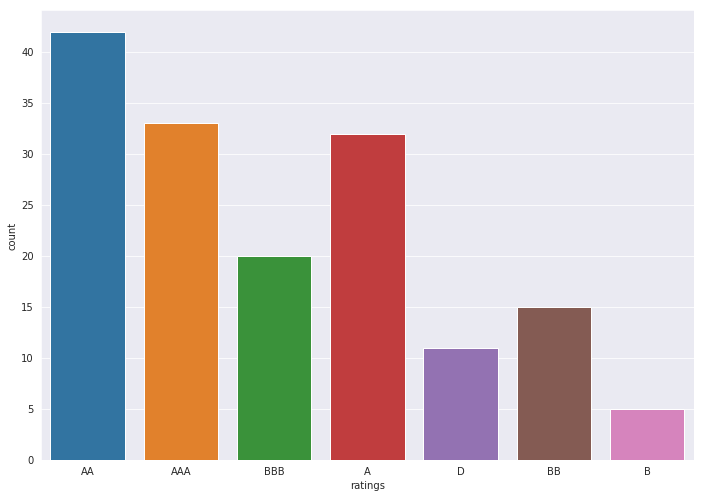

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot
sns.set_style('darkgrid')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.countplot(df['ratings'])

In [7]:
number = LabelEncoder()
df['Ratings'] = number.fit_transform(df['ratings'].astype('str'))

In [8]:
number.inverse_transform(df['Ratings'])

array(['AA', 'AA', 'AA', 'AA', 'AAA', 'AAA', 'AAA', 'AAA', 'AAA', 'AAA',
       'AAA', 'AAA', 'AAA', 'AAA', 'AAA', 'BBB', 'BBB', 'A', 'AA', 'AA',
       'AA', 'AA', 'AA', 'AAA', 'AAA', 'AAA', 'AAA', 'AAA', 'A', 'BBB',
       'AA', 'AA', 'AA', 'AA', 'AAA', 'AAA', 'AAA', 'AAA', 'AA', 'AA',
       'AAA', 'AAA', 'AAA', 'AAA', 'AAA', 'AA', 'AA', 'AA', 'AA', 'A',
       'AA', 'AA', 'AAA', 'AAA', 'AA', 'AA', 'AAA', 'AAA', 'AAA', 'D',
       'D', 'BB', 'A', 'AA', 'AA', 'AA', 'AA', 'AA', 'A', 'A', 'D', 'B',
       'B', 'AA', 'A', 'A', 'AA', 'AA', 'AA', 'AA', 'A', 'AA', 'AA', 'A',
       'A', 'BB', 'BBB', 'BBB', 'D', 'D', 'BBB', 'AAA', 'AAA', 'AAA', 'D',
       'BBB', 'BBB', 'AA', 'A', 'A', 'A', 'A', 'BBB', 'BBB', 'BBB', 'A',
       'A', 'A', 'A', 'A', 'AA', 'A', 'A', 'AA', 'A', 'AA', 'AA', 'AA',
       'A', 'A', 'BBB', 'BBB', 'A', 'B', 'D', 'BB', 'D', 'D', 'B', 'D',
       'BB', 'BB', 'AA', 'BB', 'BB', 'BB', 'A', 'A', 'BBB', 'BB', 'BB',
       'BB', 'B', 'BB', 'BBB', 'BBB', 'BB', 'BBB', 'BBB', 

In [10]:
df.head()

,ratings,operating profit margin,Net Profit margin,Return on cap employed,return on equity,EBITDA Margin,Gearing ratio,debt to equity ratio,Indebtedness Ratio,Debt to Profit Ratio,Accruals to Debt Ratio,interest coverage ratio,Debt to EBITDA,current ratio,Debtor days,Working Capital Intensity,Ratings
1,AA,19.348826,8.050933,0.112602,0.119820,0.283897,1.107455,1.105257,1.876896,3.838174,0.239095,2.638140,2.556067,1.576116,35.599482,0.122249,1
2,AA,16.281262,4.317305,0.089873,0.062802,0.256682,1.191126,1.189394,1.998187,5.021993,0.173634,1.557961,3.125424,1.203040,34.022897,0.050253,1
3,AA,19.692440,7.014280,0.129696,0.109203,0.263313,1.091072,1.089639,1.594322,3.554110,0.203911,2.046152,2.597023,2.118804,32.082752,0.164093,1
4,AA,17.938174,7.241432,0.132280,0.107410,0.225177,0.727259,0.726471,1.296456,2.730356,0.257034,2.603093,2.103337,2.234226,31.141804,0.235994,1
5,AAA,29.927491,-32.464468,0.016945,-0.115034,0.867542,5.258249,5.258249,5.892320,49.585434,0.016749,0.398410,17.008825,0.212392,112.910137,-1.409390,2


In [11]:
df['ratings'].nunique()

7

In [12]:
df.shape

(158, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 17 columns):
ratings                       158 non-null object
operating profit margin       158 non-null float64
Net Profit margin             158 non-null float64
Return on cap employed        158 non-null float64
return on equity              158 non-null float64
EBITDA Margin                 158 non-null float64
Gearing ratio                 158 non-null float64
debt to equity ratio          158 non-null float64
Indebtedness Ratio            158 non-null float64
 Debt to Profit Ratio         158 non-null float64
Accruals to Debt Ratio        158 non-null float64
interest coverage ratio       158 non-null float64
  Debt to EBITDA              158 non-null float64
current ratio                 158 non-null float64
Debtor days                   158 non-null float64
Working Capital Intensity     158 non-null float64
Ratings                       158 non-null int64
dtypes: float64(15), int64(1), 

# Upsampling the classes

Imbalanced Dataset: Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally. For example, you may have a 3-class classification problem of set of fruits to classify as oranges, apples or pears with total 100 instances . A total of 80 instances are labeled with Class-1 (Oranges), 10 instances with Class-2 (Apples) and the remaining 10 instances are labeled with Class-3 (Pears). This is an imbalanced dataset and the ratio of 8:1:1. Most classification data sets do not have exactly equal number of instances in each class, but a small difference often does not matter. There are problems where a class imbalance is not just common, it is expected. For example, in datasets like those that characterize fraudulent transactions are imbalanced. The vast majority of the transactions will be in the “Not-Fraud” class and a very small minority will be in the “Fraud” class.

## Repeating the instances

In [14]:
df.head()

,ratings,operating profit margin,Net Profit margin,Return on cap employed,return on equity,EBITDA Margin,Gearing ratio,debt to equity ratio,Indebtedness Ratio,Debt to Profit Ratio,Accruals to Debt Ratio,interest coverage ratio,Debt to EBITDA,current ratio,Debtor days,Working Capital Intensity,Ratings
1,AA,19.348826,8.050933,0.112602,0.119820,0.283897,1.107455,1.105257,1.876896,3.838174,0.239095,2.638140,2.556067,1.576116,35.599482,0.122249,1
2,AA,16.281262,4.317305,0.089873,0.062802,0.256682,1.191126,1.189394,1.998187,5.021993,0.173634,1.557961,3.125424,1.203040,34.022897,0.050253,1
3,AA,19.692440,7.014280,0.129696,0.109203,0.263313,1.091072,1.089639,1.594322,3.554110,0.203911,2.046152,2.597023,2.118804,32.082752,0.164093,1
4,AA,17.938174,7.241432,0.132280,0.107410,0.225177,0.727259,0.726471,1.296456,2.730356,0.257034,2.603093,2.103337,2.234226,31.141804,0.235994,1
5,AAA,29.927491,-32.464468,0.016945,-0.115034,0.867542,5.258249,5.258249,5.892320,49.585434,0.016749,0.398410,17.008825,0.212392,112.910137,-1.409390,2


In [15]:
df.Ratings.value_counts()

1    42
2    33
0    32
5    20
4    15
6    11
3     5
Name: Ratings, dtype: int64

In [16]:
# upsample class=2,0,5,4,6,3:


df_1 = df[df['Ratings']==1]
df_2 = pd.concat([df[df['Ratings']==2],df[df['Ratings']==2].sample(7)])
df_0 = pd.concat([df[df['Ratings']==0],df[df['Ratings']==0].sample(10)])
df_5 = pd.concat([df[df['Ratings']==5],df[df['Ratings']==5]])
df_4 = pd.concat([df[df['Ratings']==4],df[df['Ratings']==4],df[df['Ratings']==4].sample(10)])
df_6 = pd.concat([df[df['Ratings']==6],df[df['Ratings']==6],df[df['Ratings']==6],df[df['Ratings']==6].sample(7)])
df_3 = pd.concat([df[df['Ratings']==3],df[df['Ratings']==3],df[df['Ratings']==3],df[df['Ratings']==3],df[df['Ratings']==3],df[df['Ratings']==3],df[df['Ratings']==3],df[df['Ratings']==3].sample(5)])

# combine dataset all :

df_upsampled = pd.concat([df_1, df_0, df_2, df_3, df_4,df_5, df_6 ], ignore_index=True)

In [17]:
df_upsampled.Ratings.value_counts()

1    42
0    42
6    40
5    40
4    40
3    40
2    40
Name: Ratings, dtype: int64

## Visualization

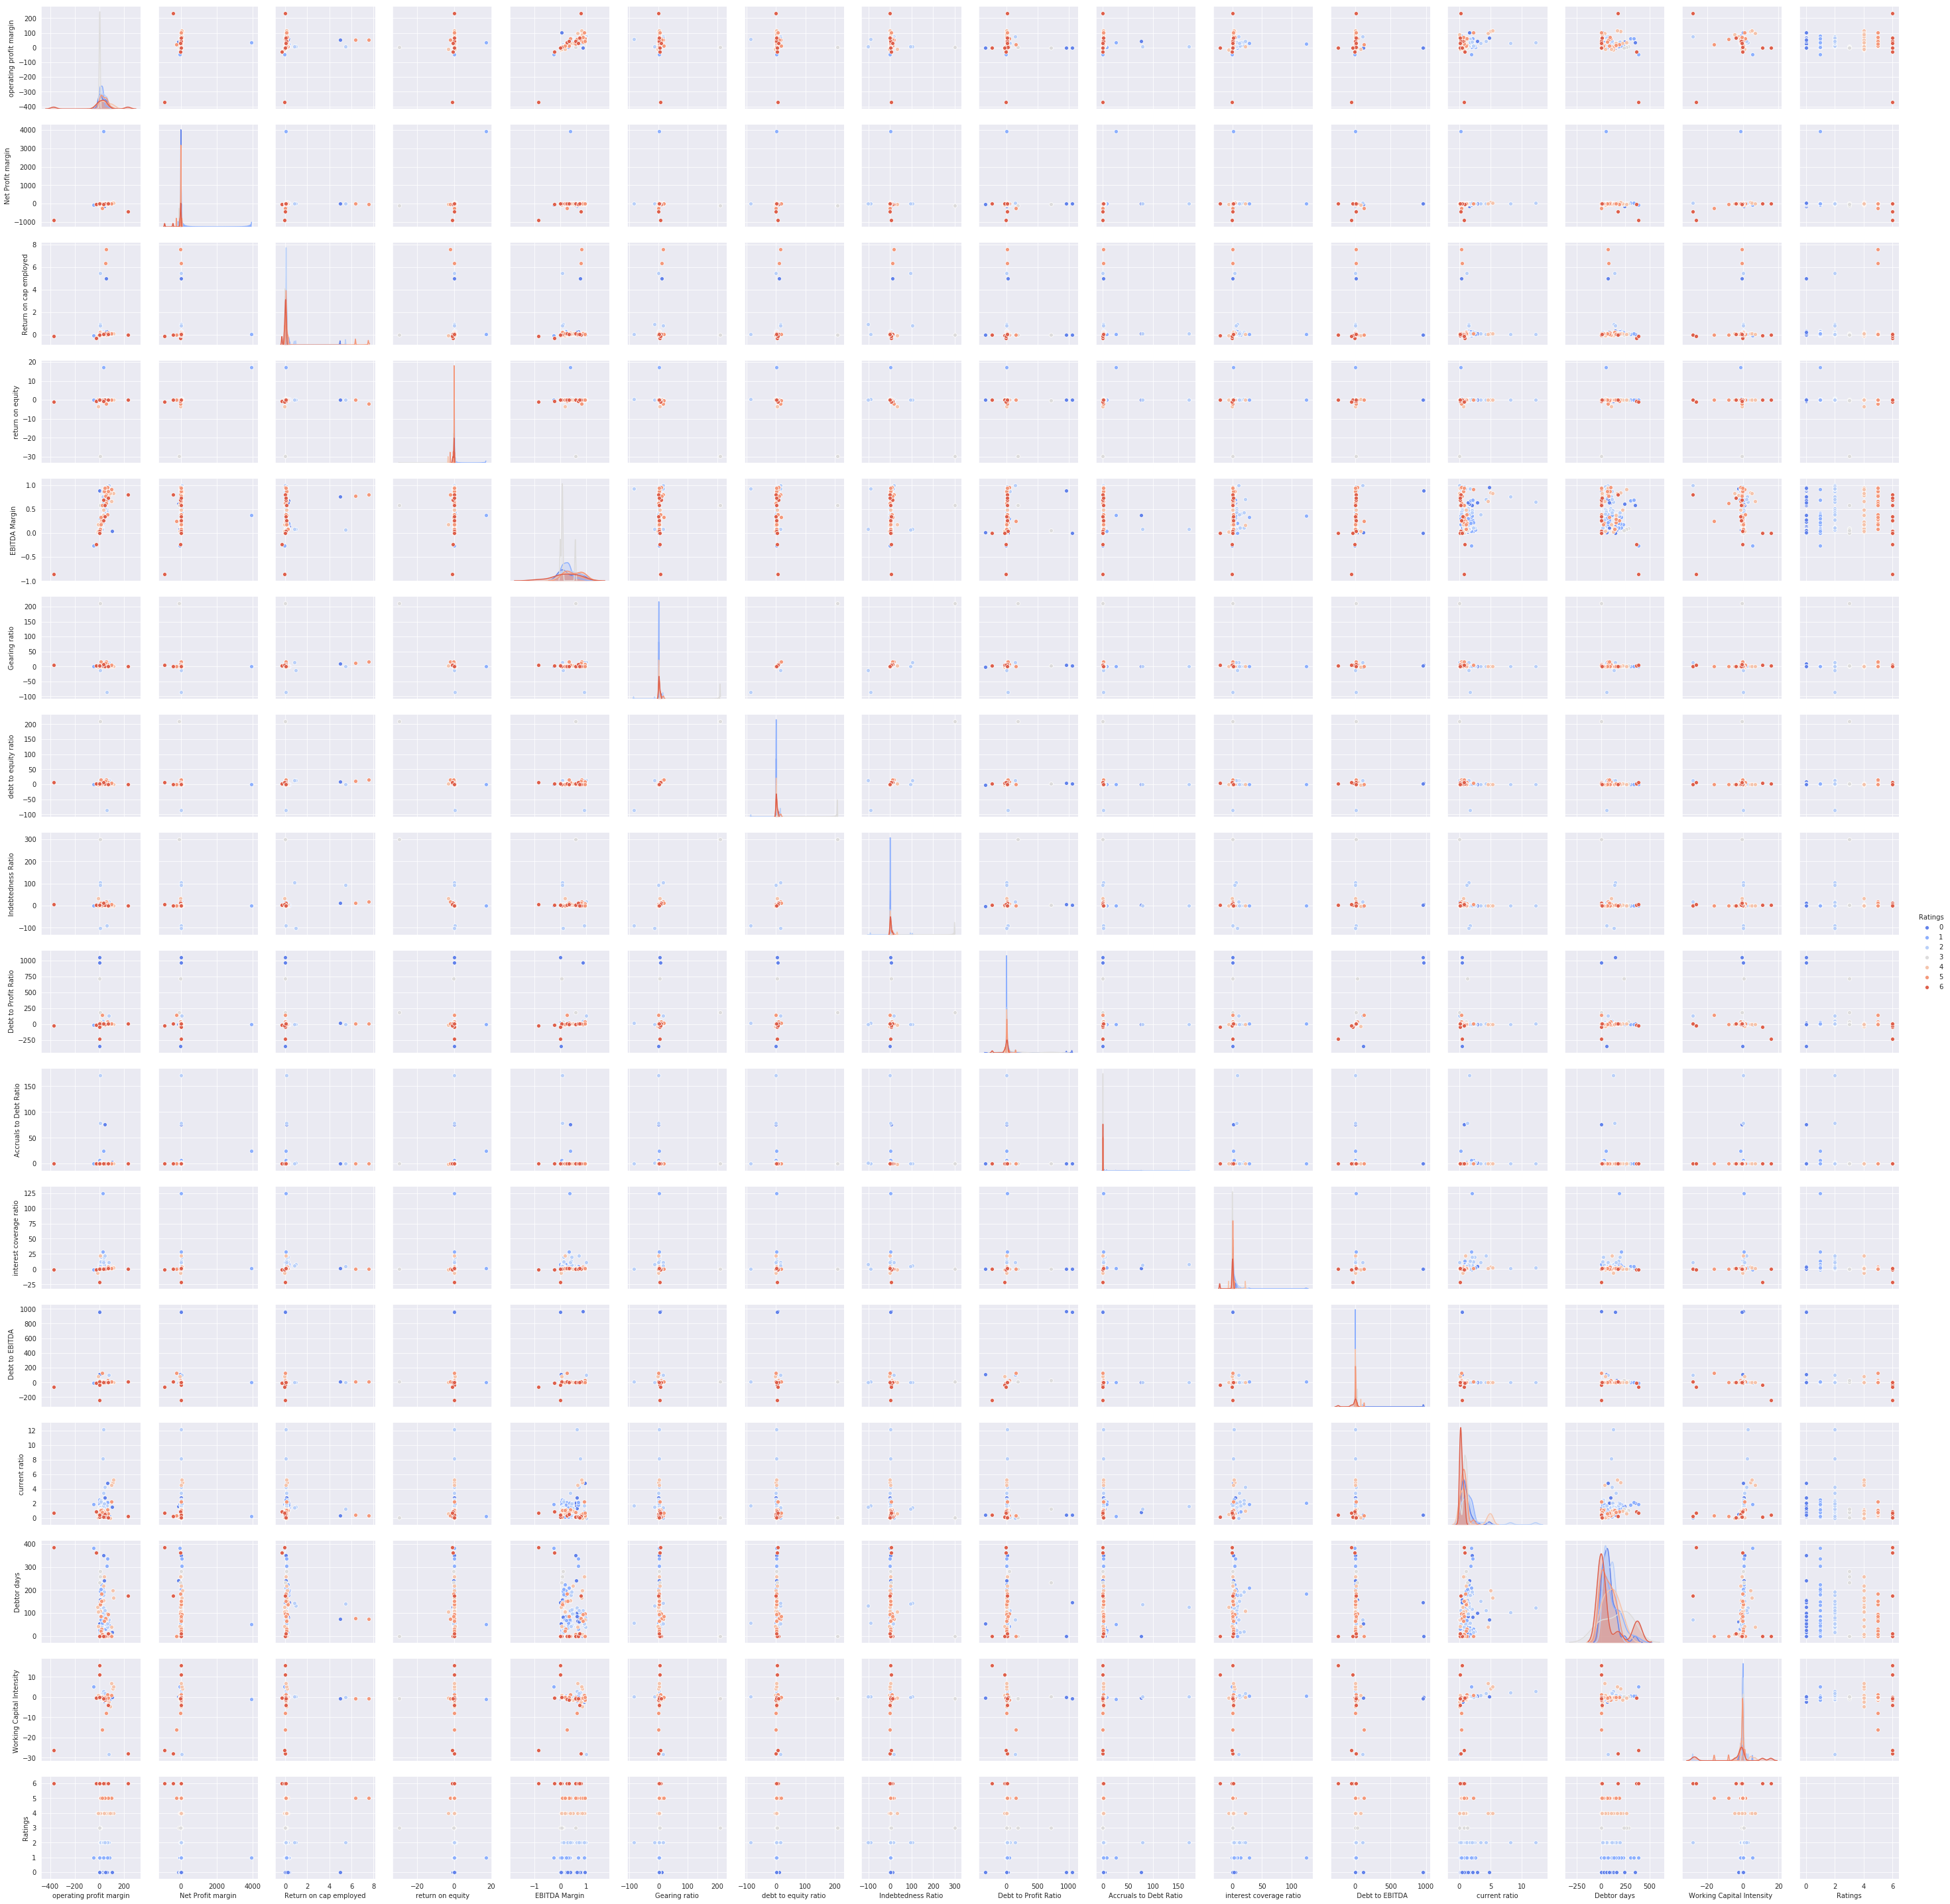

In [18]:
sns.pairplot(df,hue='Ratings',palette='coolwarm')

In [19]:
corr = df.corr()

In [20]:
corr

,operating profit margin,Net Profit margin,Return on cap employed,return on equity,EBITDA Margin,Gearing ratio,debt to equity ratio,Indebtedness Ratio,Debt to Profit Ratio,Accruals to Debt Ratio,interest coverage ratio,Debt to EBITDA,current ratio,Debtor days,Working Capital Intensity,Ratings
operating profit margin,1.000000,0.147119,0.062113,0.069576,0.713748,-0.048736,-0.052882,-0.058908,-0.042224,-0.038191,0.022713,-0.020349,0.082309,-0.236071,0.079658,0.020761
Net Profit margin,0.147119,1.000000,-0.005756,0.508870,0.070547,-0.031423,-0.031912,-0.028915,-0.013837,0.113917,0.011220,-0.003829,-0.019663,-0.104360,0.160581,-0.115929
Return on cap employed,0.062113,-0.005756,1.000000,-0.022190,0.123375,0.052634,0.060125,0.141197,-0.026012,-0.022610,-0.024828,-0.026326,-0.060436,0.005548,0.017158,0.072891
return on equity,0.069576,0.508870,-0.022190,1.000000,-0.037505,-0.793667,-0.792956,-0.727587,-0.093740,0.072546,0.030068,0.000820,0.045049,0.039633,0.009167,-0.084660
EBITDA Margin,0.713748,0.070547,0.123375,-0.037505,1.000000,0.053222,0.045634,0.019705,0.053693,-0.097222,-0.002270,0.063296,0.087427,-0.141074,-0.064040,0.098122
Gearing ratio,-0.048736,-0.031423,0.052634,-0.793667,0.053222,1.000000,0.992635,0.898531,0.112395,-0.022163,-0.035060,0.012384,-0.103663,-0.071084,-0.038064,0.068735
debt to equity ratio,-0.052882,-0.031912,0.060125,-0.792956,0.045634,0.992635,1.000000,0.863365,0.111082,-0.023179,-0.031511,0.011177,-0.101558,-0.066216,-0.036759,0.068441
Indebtedness Ratio,-0.058908,-0.028915,0.141197,-0.727587,0.019705,0.898531,0.863365,1.000000,0.092164,-0.017684,-0.036156,0.001473,-0.092779,-0.051922,-0.025962,0.057520
Debt to Profit Ratio,-0.042224,-0.013837,-0.026012,-0.093740,0.053693,0.112395,0.111082,0.092164,1.000000,-0.026814,-0.031320,0.856228,-0.062111,0.040180,-0.099925,-0.087832
Accruals to Debt Ratio,-0.038191,0.113917,-0.022610,0.072546,-0.097222,-0.022163,-0.023179,-0.017684,-0.026814,1.000000,0.029426,-0.024559,0.014214,-0.003922,0.021616,-0.064330


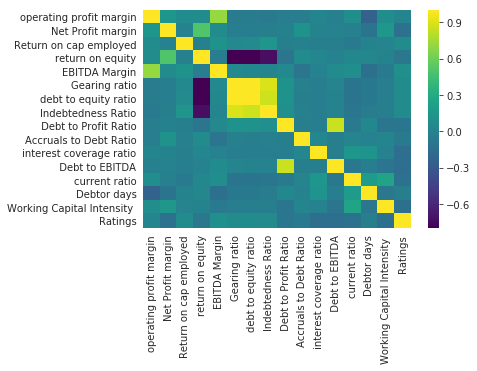

In [21]:
sns.heatmap(corr,cmap="viridis")

# Creating Ensemble models

## Creating Logistic Regression Model

In [22]:
X_lr = df_upsampled.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].values
y_lr = df_upsampled.iloc[:, 16].values

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size = 0.30, random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_lr = sc.fit_transform(X_train_lr)
X_test_lr = sc.transform(X_test_lr)

In [25]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_lr,y_train_lr)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l1'}
accuracy : 0.5151515151515151


In [26]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report
confusion_matrix(y_test_lr,logreg_cv.predict(X_test_lr))

array([[ 1,  5,  3,  0,  2,  0,  1],
       [ 0,  6,  1,  1,  2,  0,  0],
       [ 0,  5,  3,  0,  2,  1,  0],
       [ 0,  0,  0, 15,  0,  0,  0],
       [ 0,  0,  0,  0,  6,  0,  1],
       [ 6,  3,  1,  0,  5,  3,  0],
       [ 0,  0,  0,  0,  0,  0, 13]])

In [27]:
print(classification_report(y_test_lr,logreg_cv.predict(X_test_lr)))

              precision    recall  f1-score   support

           0       0.14      0.08      0.11        12
           1       0.32      0.60      0.41        10
           2       0.38      0.27      0.32        11
           3       0.94      1.00      0.97        15
           4       0.35      0.86      0.50         7
           5       0.75      0.17      0.27        18
           6       0.87      1.00      0.93        13

    accuracy                           0.55        86
   macro avg       0.53      0.57      0.50        86
weighted avg       0.58      0.55      0.51        86



## Creating Model with selected features 

In [29]:
df_upsampled.head()

,ratings,operating profit margin,Net Profit margin,Return on cap employed,return on equity,EBITDA Margin,Gearing ratio,debt to equity ratio,Indebtedness Ratio,Debt to Profit Ratio,Accruals to Debt Ratio,interest coverage ratio,Debt to EBITDA,current ratio,Debtor days,Working Capital Intensity,Ratings
0,AA,19.348826,8.050933,0.112602,0.119820,0.283897,1.107455,1.105257,1.876896,3.838174,0.239095,2.638140,2.556067,1.576116,35.599482,0.122249,1
1,AA,16.281262,4.317305,0.089873,0.062802,0.256682,1.191126,1.189394,1.998187,5.021993,0.173634,1.557961,3.125424,1.203040,34.022897,0.050253,1
2,AA,19.692440,7.014280,0.129696,0.109203,0.263313,1.091072,1.089639,1.594322,3.554110,0.203911,2.046152,2.597023,2.118804,32.082752,0.164093,1
3,AA,17.938174,7.241432,0.132280,0.107410,0.225177,0.727259,0.726471,1.296456,2.730356,0.257034,2.603093,2.103337,2.234226,31.141804,0.235994,1
4,AA,37.950585,-40.851101,0.122530,-0.212498,0.416185,0.864883,0.859321,1.434559,4.352978,-0.300554,1.998198,3.533614,0.221472,54.579617,-1.218609,1


In [40]:
X_lr_selected_features = df_upsampled.iloc[:, [1,10,11,12,14]].values
y_lr_selected_features = df_upsampled.iloc[:, 16].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_lr_1, X_test_lr_1, y_train_lr_1, y_test_lr_1 = train_test_split(X_lr_selected_features, y_lr_selected_features, test_size = 0.30, random_state = 0)
X_train_lr_1 = sc.fit_transform(X_train_lr_1)
X_test_lr_1 = sc.transform(X_test_lr_1)

In [41]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_, grid_search

In [42]:
best_param, grid_search_svm = svc_param_selection(X_train_lr_1,y_train_lr_1,10)

In [43]:
best_param

{'C': 10, 'gamma': 1}

In [44]:
grid_search_svm

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report, accuracy_score
confusion_matrix(y_test_lr_1, grid_search_svm.predict(X_test_lr_1))

array([[ 6,  1,  1,  0,  4,  0,  0],
       [ 0,  5,  2,  0,  2,  0,  1],
       [ 0,  3,  7,  0,  1,  0,  0],
       [ 0,  0,  0, 15,  0,  0,  0],
       [ 0,  0,  0,  0,  6,  0,  1],
       [ 4,  3,  0,  0,  2,  3,  6],
       [ 0,  0,  0,  1,  0,  0, 12]])

In [46]:
accuracy_score(y_test_lr_1, grid_search_svm.predict(X_test_lr_1))*100

62.7906976744186

In [47]:
print(classification_report(y_test_lr_1, grid_search_svm.predict(X_test_lr_1)))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.42      0.50      0.45        10
           2       0.70      0.64      0.67        11
           3       0.94      1.00      0.97        15
           4       0.40      0.86      0.55         7
           5       1.00      0.17      0.29        18
           6       0.60      0.92      0.73        13

    accuracy                           0.63        86
   macro avg       0.66      0.65      0.60        86
weighted avg       0.72      0.63      0.60        86



## LR Model with selected features 

In [48]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_lr_1,y_train_lr_1)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1'}
accuracy : 0.37373737373737376


In [49]:
confusion_matrix(y_test_lr_1, logreg_cv.predict(X_test_lr_1))

array([[ 3,  2,  2,  1,  4,  0,  0],
       [ 1,  3,  2,  2,  2,  0,  0],
       [ 0,  3,  6,  0,  2,  0,  0],
       [ 7,  0,  0,  8,  0,  0,  0],
       [ 1,  0,  0,  1,  3,  0,  2],
       [ 8,  0,  0,  0, 10,  0,  0],
       [ 9,  0,  0,  2,  2,  0,  0]])

# Ensemble Modeling using Neural network

## How to Tune Batch Size and Number of Epochs

In [50]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [51]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [53]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# split into input (X) and output (Y) variables
X = X_lr_selected_features
Y = y_lr_selected_features

In [54]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

In [55]:
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)

In [56]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.323944 using {'batch_size': 100, 'epochs': 10}
0.007042 (0.009933) with: {'batch_size': 10, 'epochs': 10}
0.003521 (0.004967) with: {'batch_size': 10, 'epochs': 50}
0.000000 (0.000000) with: {'batch_size': 10, 'epochs': 100}
0.024648 (0.034766) with: {'batch_size': 20, 'epochs': 10}
0.010563 (0.014900) with: {'batch_size': 20, 'epochs': 50}
0.010563 (0.014900) with: {'batch_size': 20, 'epochs': 100}
0.003521 (0.004967) with: {'batch_size': 40, 'epochs': 10}
0.000000 (0.000000) with: {'batch_size': 40, 'epochs': 50}
0.000000 (0.000000) with: {'batch_size': 40, 'epochs': 100}
0.186620 (0.263225) with: {'batch_size': 60, 'epochs': 10}
0.045775 (0.064565) with: {'batch_size': 60, 'epochs': 50}
0.003521 (0.004967) with: {'batch_size': 60, 'epochs': 100}
0.007042 (0.009933) with: {'batch_size': 80, 'epochs': 10}
0.000000 (0.000000) with: {'batch_size': 80, 'epochs': 50}
0.000000 (0.000000) with: {'batch_size': 80, 'epochs': 100}
0.323944 (0.456918) with: {'batch_size': 100, 'epochs':

## How to Tune the Training Optimization Algorithm

In [57]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [58]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=100, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)

In [59]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.056338 using {'optimizer': 'Adam'}
0.000000 (0.000000) with: {'optimizer': 'SGD'}
0.007042 (0.009933) with: {'optimizer': 'RMSprop'}
0.007042 (0.009933) with: {'optimizer': 'Adagrad'}
0.000000 (0.000000) with: {'optimizer': 'Adadelta'}
0.056338 (0.079464) with: {'optimizer': 'Adam'}
0.024648 (0.034766) with: {'optimizer': 'Adamax'}
0.028169 (0.039732) with: {'optimizer': 'Nadam'}


## How to Tune Learning Rate and Momentum 

In [60]:
# Use scikit-learn to grid search the learning rate and momentum
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [61]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.161972 using {'learn_rate': 0.001, 'momentum': 0.4}
0.010563 (0.014900) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.010563 (0.014900) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.161972 (0.228459) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.000000 (0.000000) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.000000 (0.000000) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.000000 (0.000000) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.000000 (0.000000) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.007042 (0.009933) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.000000 (0.000000) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.000000 (0.000000) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.000000 (0.000000) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.000000 (0.000000) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.000000 (0.000000) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.000000 (0.000000) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.000000 (0.000000) with: {'learn_rate':

## How to Tune Network Weight Initialization

In [63]:
# Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=5, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [64]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.017606 using {'init_mode': 'he_uniform'}
0.014085 (0.019866) with: {'init_mode': 'uniform'}
0.010563 (0.014900) with: {'init_mode': 'lecun_uniform'}
0.014085 (0.019866) with: {'init_mode': 'normal'}
0.000000 (0.000000) with: {'init_mode': 'zero'}
0.014085 (0.019866) with: {'init_mode': 'glorot_normal'}
0.000000 (0.000000) with: {'init_mode': 'glorot_uniform'}
0.000000 (0.000000) with: {'init_mode': 'he_normal'}
0.017606 (0.024833) with: {'init_mode': 'he_uniform'}


## How to Tune the Neuron Activation Function

In [66]:
# Use scikit-learn to grid search the activation function
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=5, kernel_initializer='uniform', activation=activation))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [67]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.031690 using {'activation': 'linear'}
0.000000 (0.000000) with: {'activation': 'softmax'}
0.000000 (0.000000) with: {'activation': 'softplus'}
0.028169 (0.039732) with: {'activation': 'softsign'}
0.014085 (0.019866) with: {'activation': 'relu'}
0.021127 (0.029799) with: {'activation': 'tanh'}
0.000000 (0.000000) with: {'activation': 'sigmoid'}
0.000000 (0.000000) with: {'activation': 'hard_sigmoid'}
0.031690 (0.044699) with: {'activation': 'linear'}


# Designing the Model

In [ ]:
X_test.shape

In [ ]:
from datetime import datetime

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
folds = 3
param_comb = 5
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

In [ ]:
y_predXG = XGclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predXG)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
RFclassifier.fit(X_train, y_train)

In [ ]:
y_predRF = RFclassifier.predict(X_test)
accuracy_score(y_test, y_predRF)

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

# Trying neural network for ensemble modeling

In [ ]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
df.head()

In [ ]:
X = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].values
Y = df.iloc[:, 16].values

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [ ]:
dummy_y

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.25, random_state = 0)

In [ ]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=15, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=45)

In [ ]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))